In [54]:

from pyscf import gto, scf

# Define the molecule
mol = gto.M(
    atom = '/geometry/H20.xyz' ,  # Coordinates of atoms
    basis = 'DZP'                     # Basis set
)
mf = scf.RHF(mol)
mf.kernel()

# Get the molecular orbital coefficients and density matrix
mo_coeff = mf.mo_coeff
density_matrix = mf.make_rdm1()



RuntimeError: Unsupported atom symbol /GEOMETRY/H20.XYZ

In [20]:
import numpy as np
# Find the HOMO energy
num_electrons = mol.nelectron
num_occupied = num_electrons // 2  # Assuming a closed-shell configuration
homo_energy = mo_energy[num_occupied - 1]

# Set an energy cutoff (e.g., 2 eV above the HOMO)
energy_cutoff = 2.0  # Units in eV or Hartree as needed
truncated_indices = [i for i, energy in enumerate(mo_energy) if energy <= homo_energy + energy_cutoff]

# Filter MO coefficients and energies based on the truncation
num_orbitals = len(truncated_indices)
mutual_info_matrix = np.zeros((num_orbitals, num_orbitals))

for i in range(num_orbitals):
    for j in range(num_orbitals):
        mutual_info_matrix[i, j] = np.abs(np.dot(truncated_mo_coeff[:, i].T, density_matrix @ truncated_mo_coeff[:, j]))

# Normalize the mutual information matrix
mutual_info_matrix /= np.max(mutual_info_matrix)


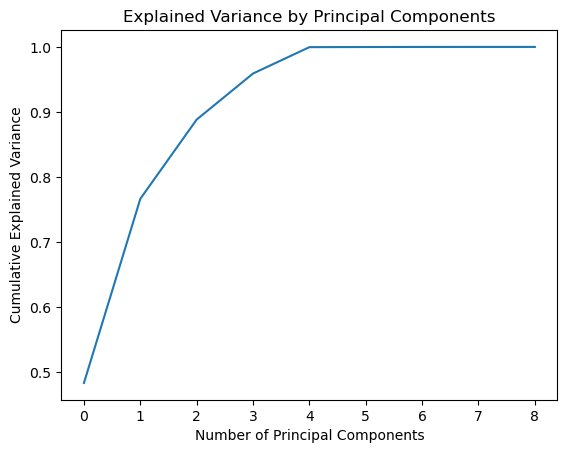

Principal Component 1: Significant Orbitals:
Orbitals [1 0 3 4 2] with contributions [ 0.62090042  0.44525095 -0.34787335 -0.34787335  0.25645377]
Principal Component 2: Significant Orbitals:
Orbitals [4 3 7 8 0] with contributions [ 6.70767125e-01 -6.70767125e-01 -2.23766540e-01  2.23766540e-01
 -9.43747456e-16]
Principal Component 3: Significant Orbitals:
Orbitals [2 0 1 4 3] with contributions [ 0.74085802 -0.38895927 -0.28924516 -0.26830257 -0.26830257]


In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to the mutual information matrix
pca = PCA()
pca.fit(mutual_info_matrix)

# Visualize the explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

# Identify the most significant orbitals based on PCA loadings
principal_components = pca.components_
for i, component in enumerate(principal_components[:3]):  # Top 3 components
    print(f'Principal Component {i + 1}: Significant Orbitals:')
    significant_orbitals = np.argsort(-np.abs(component))[:5]  # Top 5 orbitals contributing
    print(f'Orbitals {significant_orbitals} with contributions {component[significant_orbitals]}')



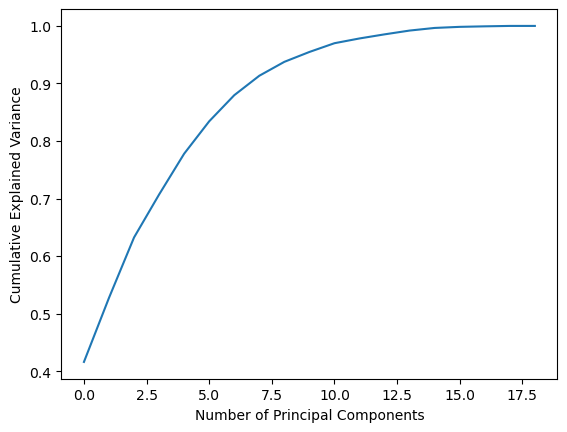

Principal Component 1: Significant Orbitals:
Orbitals [ 7  6  4 13  0] with contributions [0.58332941 0.39138518 0.35429934 0.33027076 0.29310509]
Principal Component 2: Significant Orbitals:
Orbitals [ 0  1  7  6 10] with contributions [ 0.5104998   0.45204211 -0.40046309 -0.32036363  0.24713514]
Principal Component 3: Significant Orbitals:
Orbitals [11 12  8  9  2] with contributions [ 0.44402693 -0.44402693  0.40028433 -0.40028433  0.37538243]


In [9]:
import matplotlib.pyplot as plt

# Plot the explained variance to understand the contributions
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Print significant orbitals contributing to the top principal components
for i, component in enumerate(principal_components[:3]):  # Top 3 components
    print(f'Principal Component {i + 1}: Significant Orbitals:')
    significant_orbitals = np.argsort(-np.abs(component))[:5]  # Top 5 contributions
    print(f'Orbitals {significant_orbitals} with contributions {component[significant_orbitals]}')


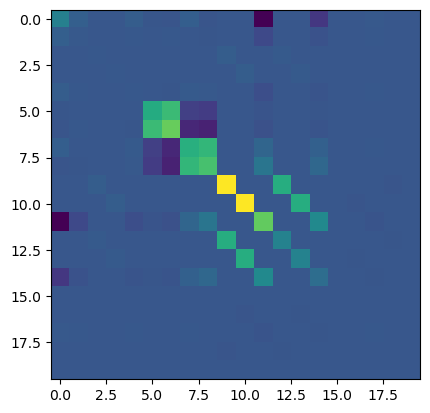

In [27]:
plt.imshow(density_matrix)

In [28]:
eig,eig_vec = np.linalg.eig(density_matrix)

In [32]:
eig_vec

NPArrayWithTag([[ 6.15534206e-02+0.00000000e+00j,
                 -4.24417225e-01+0.00000000e+00j,
                 -2.16849749e-01+0.00000000e+00j,
                  2.53567771e-01+0.00000000e+00j,
                 -2.67940748e-01+0.00000000e+00j,
                 -9.02627857e-16+0.00000000e+00j,
                  2.99444892e-02+0.00000000e+00j,
                  7.35799074e-17+0.00000000e+00j,
                 -1.81227021e-01+0.00000000e+00j,
                  7.81808324e-02+0.00000000e+00j,
                  1.99852588e-01+0.00000000e+00j,
                 -4.29584193e-02+0.00000000e+00j,
                 -1.69453636e-02+1.41155192e-02j,
                 -1.69453636e-02-1.41155192e-02j,
                 -4.49326997e-02+0.00000000e+00j,
                  5.99031176e-03+0.00000000e+00j,
                  2.38826298e-03+0.00000000e+00j,
                 -1.94848889e-04+0.00000000e+00j,
                  2.39963682e-17+0.00000000e+00j,
                  1.97452475e-16+0.00000000e+00j],

In [52]:
energy_gap = np.zeros((len(mo_energy)-1,len(mo_energy)-1))
for i in range(len(mo_energy)-1):
    for j in range(len(mo_energy)-1):
        print(mo_energy[i])
        print(mo_energy[j])
        energy_gap[i,j] = 1/abs(mo_energy[i]-mo_energy[j])
'''
energy_gap= energy_gap.reshape(-1, 1)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3)  # Adjust number of clusters as needed
labels = kmeans.fit_predict(energy_gap)

# Visualize the clustering result
plt.scatter(range(len(energy_gap)), energy_gap, c=labels)
plt.xlabel('Orbital Index')
plt.ylabel('Energy Difference')
plt.title('Clustering of Orbitals Based on Energy Differences')
plt.show()
'''

-26.28005744130098
-26.28005744130098
-26.28005744130098
-1.5336521923790607
-26.28005744130098
-0.6785979892192425
-26.28005744130098
-0.6134289840303245
-26.28005744130098
-0.6134289840303212
-26.28005744130098
0.13711814605853664
-26.28005744130098
0.6736952005834052
-26.28005744130098
1.3528750892864794
-26.28005744130098
1.352875089286481
-26.28005744130098
1.4891808050938686
-26.28005744130098
1.62832919962779
-26.28005744130098
1.628329199627798
-26.28005744130098
2.0212486467487345
-26.28005744130098
2.2270215525961894
-26.28005744130098
4.020315119183392
-26.28005744130098
4.020315119183394
-26.28005744130098
4.139450322653178
-26.28005744130098
4.13945032265318
-1.5336521923790607
-26.28005744130098
-1.5336521923790607
-1.5336521923790607
-1.5336521923790607
-0.6785979892192425
-1.5336521923790607
-0.6134289840303245
-1.5336521923790607
-0.6134289840303212
-1.5336521923790607
0.13711814605853664
-1.5336521923790607
0.6736952005834052
-1.5336521923790607
1.3528750892864794
-1.

/var/folders/1l/gq5b71b96sq0jc603prbznhr0000gn/T/ipykernel_49145/565958891.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  energy_gap[i,j] = 1/abs(mo_energy[i]-mo_energy[j])


"\nenergy_gap= energy_gap.reshape(-1, 1)\n\n# Apply k-means clustering\nkmeans = KMeans(n_clusters=3)  # Adjust number of clusters as needed\nlabels = kmeans.fit_predict(energy_gap)\n\n# Visualize the clustering result\nplt.scatter(range(len(energy_gap)), energy_gap, c=labels)\nplt.xlabel('Orbital Index')\nplt.ylabel('Energy Difference')\nplt.title('Clustering of Orbitals Based on Energy Differences')\nplt.show()\n"

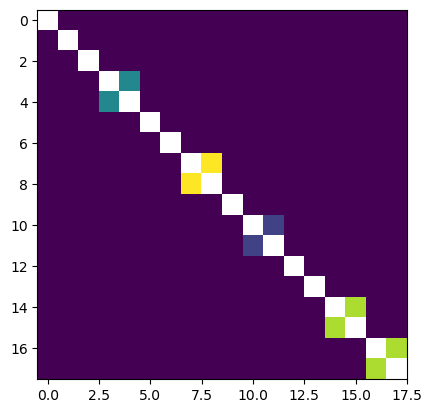

In [53]:
plt.imshow(energy_gap)

In [48]:
energy_gap

array([[ 0.00000000e+00, -2.47464052e+01, -2.56014595e+01,
        -2.56666285e+01, -2.56666285e+01, -2.64171756e+01,
        -2.69537526e+01, -2.76329325e+01, -2.76329325e+01,
        -2.77692382e+01, -2.79083866e+01, -2.79083866e+01,
        -2.83013061e+01, -2.85070790e+01, -3.03003726e+01,
        -3.03003726e+01, -3.04195078e+01, -3.04195078e+01],
       [ 2.47464052e+01,  0.00000000e+00, -8.55054203e-01,
        -9.20223208e-01, -9.20223208e-01, -1.67077034e+00,
        -2.20734739e+00, -2.88652728e+00, -2.88652728e+00,
        -3.02283300e+00, -3.16198139e+00, -3.16198139e+00,
        -3.55490084e+00, -3.76067374e+00, -5.55396731e+00,
        -5.55396731e+00, -5.67310252e+00, -5.67310252e+00],
       [ 2.56014595e+01,  8.55054203e-01,  0.00000000e+00,
        -6.51690052e-02, -6.51690052e-02, -8.15716135e-01,
        -1.35229319e+00, -2.03147308e+00, -2.03147308e+00,
        -2.16777879e+00, -2.30692719e+00, -2.30692719e+00,
        -2.69984664e+00, -2.90561954e+00, -4.69891311e